In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Data Loading and Pre-processing

In [6]:
# Load  dataset
df = pd.read_csv("modified_traffic.csv")

df.head(5)

,DateTime,Junction,Vehicles,Hour,Day,Month,Weekday
0,2015-11-01 00:00:00,1,15,0,1,11,6
1,2015-11-01 01:00:00,1,13,1,1,11,6
2,2015-11-01 02:00:00,1,10,2,1,11,6
3,2015-11-01 03:00:00,1,7,3,1,11,6
4,2015-11-01 04:00:00,1,9,4,1,11,6


In [7]:
df.describe()

,Junction,Vehicles,Hour,Day,Month,Weekday
count,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,11.500000,15.700748,5.884289,2.996010
std,0.966955,20.750063,6.922258,8.784073,3.569872,2.000017
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,9.000000,5.750000,8.000000,3.000000,1.000000
50%,2.000000,15.000000,11.500000,16.000000,5.000000,3.000000
75%,3.000000,29.000000,17.250000,23.000000,9.000000,5.000000
max,4.000000,180.000000,23.000000,31.000000,12.000000,6.000000


In [8]:
df.shape

(48120, 7)

In [9]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
Hour        0
Day         0
Month       0
Weekday     0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,DateTime,Junction,Vehicles,Hour,Day,Month,Weekday
0,2015-11-01 00:00:00,1,15,0,1,11,6
1,2015-11-01 01:00:00,1,13,1,1,11,6
2,2015-11-01 02:00:00,1,10,2,1,11,6
3,2015-11-01 03:00:00,1,7,3,1,11,6
4,2015-11-01 04:00:00,1,9,4,1,11,6
...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,19,30,6,4
48116,2017-06-30 20:00:00,4,30,20,30,6,4
48117,2017-06-30 21:00:00,4,16,21,30,6,4
48118,2017-06-30 22:00:00,4,22,22,30,6,4


In [12]:
data=pd.read_csv("traffic.csv")
data.head(5)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [13]:
data.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [14]:
data.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


Model Building

In [17]:
#Set the Independent features and dependent target values
x=df[['Hour','Day','Month','Junction','Weekday']]
y=df['Vehicles']

In [18]:
#splitting into training and testing datastets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
#training the linear regression model
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [20]:
#putting the model into the test data
y_pred=reg.predict(x_test)

Model Evaluation

In [21]:
#evaluating the model
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)
print("Mean Absolute Error:",mae)

Mean Squared Error: 229.81596257687823
R2 Score: 0.4646203594608854
Mean Absolute Error: 11.15689101902117


Visualizing the predictions

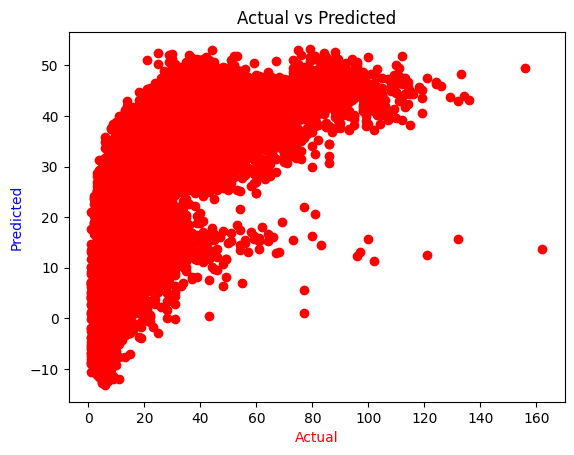

In [22]:
#visualizing the model
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual',color='red')
plt.ylabel('Predicted',color='blue')
plt.title('Actual vs Predicted')
plt.show()

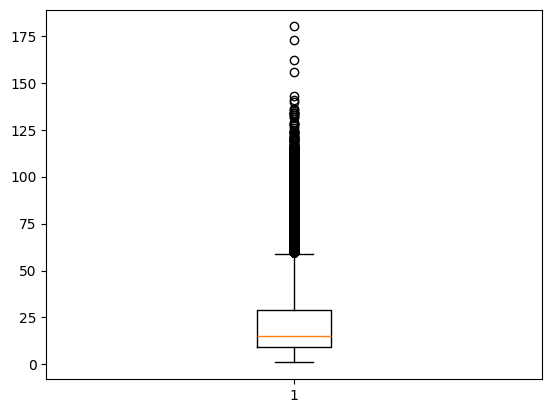

In [23]:
plt.boxplot(df['Vehicles'])
plt.show()

In [24]:
df

,DateTime,Junction,Vehicles,Hour,Day,Month,Weekday
0,2015-11-01 00:00:00,1,15,0,1,11,6
1,2015-11-01 01:00:00,1,13,1,1,11,6
2,2015-11-01 02:00:00,1,10,2,1,11,6
3,2015-11-01 03:00:00,1,7,3,1,11,6
4,2015-11-01 04:00:00,1,9,4,1,11,6
...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,19,30,6,4
48116,2017-06-30 20:00:00,4,30,20,30,6,4
48117,2017-06-30 21:00:00,4,16,21,30,6,4
48118,2017-06-30 22:00:00,4,22,22,30,6,4


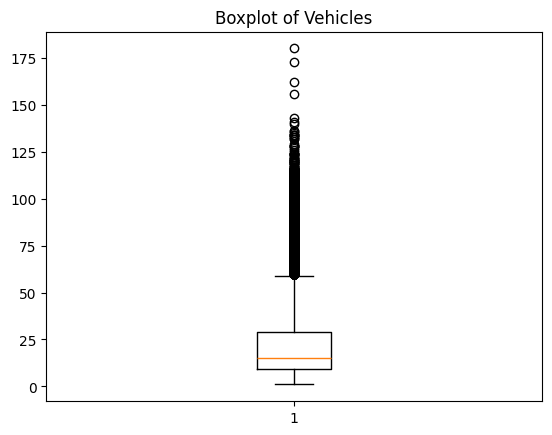

Lower Bound: -21.0, Upper Bound: 59.0


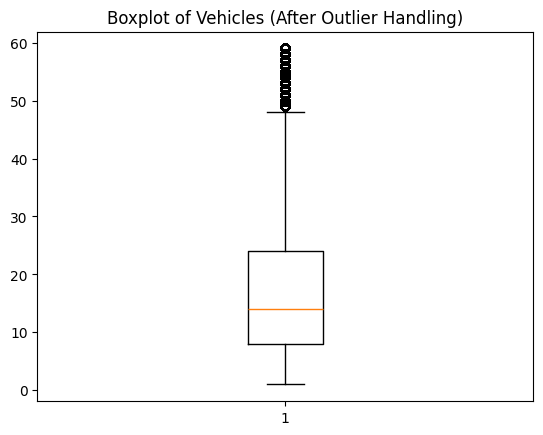

,DateTime,Junction,Vehicles,Hour,Day,Month,Weekday
0,2015-11-01 00:00:00,1,15,0,1,11,6
1,2015-11-01 01:00:00,1,13,1,1,11,6
2,2015-11-01 02:00:00,1,10,2,1,11,6
3,2015-11-01 03:00:00,1,7,3,1,11,6
4,2015-11-01 04:00:00,1,9,4,1,11,6


In [25]:
# Visualize the outliers
plt.boxplot(df['Vehicles'])
plt.title('Boxplot of Vehicles')
plt.show()

# Detect outliers using the IQR method
Q1 = df['Vehicles'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Vehicles'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Remove outliers
df = df[(df['Vehicles'] >= lower_bound) & (df['Vehicles'] <= upper_bound)]

# Alternatively, cap the outliers (if you don't want to remove them)
# df['Vehicles'] = np.where(df['Vehicles'] < lower_bound, lower_bound, df['Vehicles'])
# df['Vehicles'] = np.where(df['Vehicles'] > upper_bound, upper_bound, df['Vehicles'])

# Visualize the data after handling outliers
plt.boxplot(df['Vehicles'])
plt.title('Boxplot of Vehicles (After Outlier Handling)')
plt.show()

# Display the updated dataset
df.head()

In [26]:
#Set the Independent features and dependent target values
x=df[['Hour','Day','Month','Junction','Weekday']]
y=df['Vehicles']

In [27]:
#splitting into training and testing datastets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [28]:
#training the linear regression model
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
#putting the model into the test data
y_pred=reg.predict(x_test)

In [30]:
#evaluating the model
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)
print("Mean Absolute Error:",mae)

Mean Squared Error: 98.00460312146068
R2 Score: 0.44953913975020254
Mean Absolute Error: 7.7097562505852215


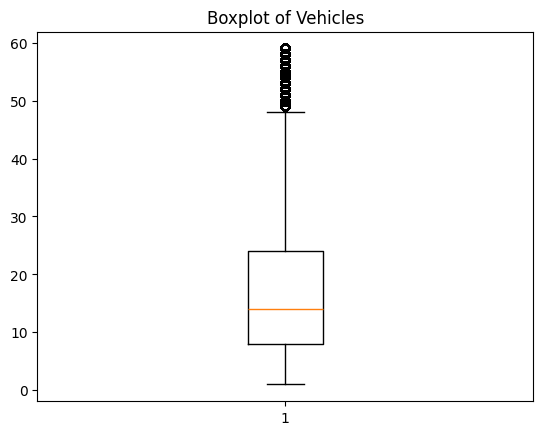

Lower Bound: -16.0, Upper Bound: 48.0


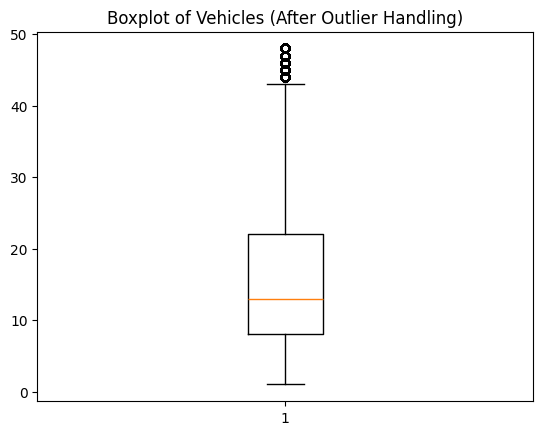

,DateTime,Junction,Vehicles,Hour,Day,Month,Weekday
0,2015-11-01 00:00:00,1,15,0,1,11,6
1,2015-11-01 01:00:00,1,13,1,1,11,6
2,2015-11-01 02:00:00,1,10,2,1,11,6
3,2015-11-01 03:00:00,1,7,3,1,11,6
4,2015-11-01 04:00:00,1,9,4,1,11,6


In [31]:
# Visualize the outliers
plt.boxplot(df['Vehicles'])
plt.title('Boxplot of Vehicles')
plt.show()

# Detect outliers using the IQR method
Q1 = df['Vehicles'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Vehicles'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Remove outliers
df = df[(df['Vehicles'] >= lower_bound) & (df['Vehicles'] <= upper_bound)]

# Alternatively, cap the outliers (if you don't want to remove them)
# df['Vehicles'] = np.where(df['Vehicles'] < lower_bound, lower_bound, df['Vehicles'])
# df['Vehicles'] = np.where(df['Vehicles'] > upper_bound, upper_bound, df['Vehicles'])

# Visualize the data after handling outliers
plt.boxplot(df['Vehicles'])
plt.title('Boxplot of Vehicles (After Outlier Handling)')
plt.show()

# Display the updated dataset
df.head()

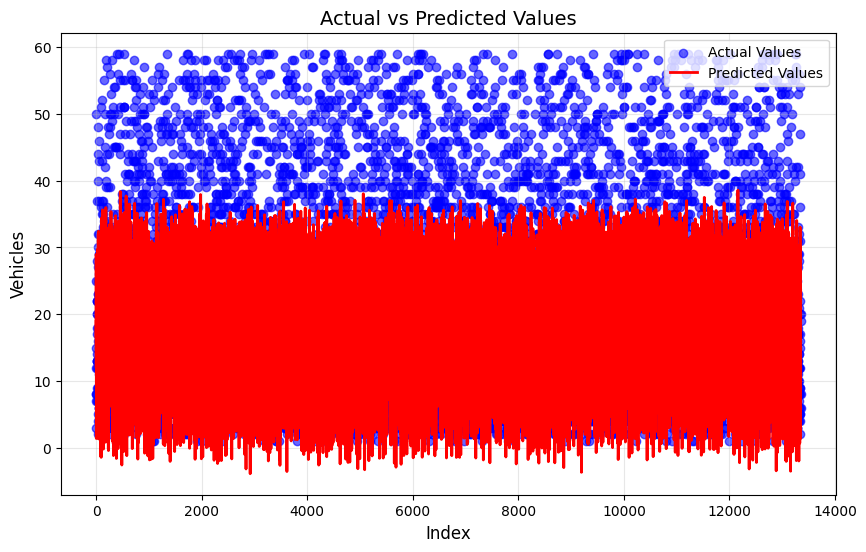

In [32]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.6)

# Line plot for predicted values
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', linewidth=2)

# Adding labels, title, and legend
plt.xlabel('Index', fontsize=12)
plt.ylabel('Vehicles', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

In [34]:
# Function to take input and predict
def predict_vehicles():
    # Prompt user for input values
    hour = int(input("Enter Hour (0-23): "))#15
    day = int(input("Enter Day (1-31): "))#14
    month = int(input("Enter Month (1-12): "))#10
    junction = int(input("Enter Junction (1-4): "))#2
    weekday = int(input("Enter Weekday (0 for Monday, 6 for Sunday): "))#6
    
    # Create a DataFrame for the input
    input_data = pd.DataFrame([[hour, day, month, junction, weekday]], 
                              columns=['Hour', 'Day', 'Month', 'Junction', 'Weekday'])
    
    # Predict using the trained model
    prediction = reg.predict(input_data)
    
    # Display the prediction
    print(f"Predicted Number of Vehicles: {prediction[0]:.2f}")

# Call the function
predict_vehicles()

Predicted Number of Vehicles: 22.48
